In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
main_dir = '/content/gdrive/My Drive/krushimitra_be/weather_data/dataset.csv'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv(main_dir, parse_dates=['datetime_utc'], index_col='datetime_utc')

In [ ]:
data.shape

data.ffill(inplace=True)
data[data.isnull()].count()

 _conds         0
 _dewptm        0
 _fog           0
 _hail          0
 _heatindexm    0
 _hum           0
 _precipm       0
 _pressurem     0
 _rain          0
 _snow          0
 _tempm         0
 _thunder       0
 _tornado       0
 _vism          0
 _wdird         0
 _wdire         0
 _wspdm         0
 _wgustm        0
 _windchillm    0
dtype: int64

In [ ]:
data_df = data.loc[:,[' _hum', ' _tempm']]
data_df = data_df.rename(index=str, columns={' _hum': 'humidity', ' _pressurem': 'pressure', ' _tempm': 'temprature'})

In [ ]:
data_df.index = pd.to_datetime(data.index)
data_df.index

DatetimeIndex(['1996-11-01 11:00:00', '1996-11-01 12:00:00',
               '1996-11-01 13:00:00', '1996-11-01 14:00:00',
               '1996-11-01 16:00:00', '1996-11-01 17:00:00',
               '1996-11-01 18:00:00', '1996-11-01 19:00:00',
               '1996-11-01 20:00:00', '1996-11-01 21:00:00',
               ...
               '2017-04-23 15:00:00', '2017-04-23 18:00:00',
               '2017-04-23 21:00:00', '2017-04-24 00:00:00',
               '2017-04-24 03:00:00', '2017-04-24 06:00:00',
               '2017-04-24 09:00:00', '2017-04-24 12:00:00',
               '2017-04-24 15:00:00', '2017-04-24 18:00:00'],
              dtype='datetime64[ns]', name='datetime_utc', length=100990, freq=None)

In [ ]:
data_df.head()

,humidity,temprature
datetime_utc,,
1996-11-01 11:00:00,27.0,30.0
1996-11-01 12:00:00,32.0,28.0
1996-11-01 13:00:00,44.0,24.0
1996-11-01 14:00:00,41.0,24.0
1996-11-01 16:00:00,47.0,23.0


In [ ]:
data_df.describe()

,humidity,temprature
count,100990.000000,100990.000000
mean,57.957422,25.438222
std,23.821218,8.487994
min,4.000000,1.000000
25%,39.000000,19.000000
50%,59.000000,27.000000
75%,78.000000,32.000000
max,243.000000,90.000000


In [ ]:
data_df = data_df[data_df.temprature < 50]
data_df = data_df[data_df.humidity <= 100]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc64853e610>,
      dtype=object)

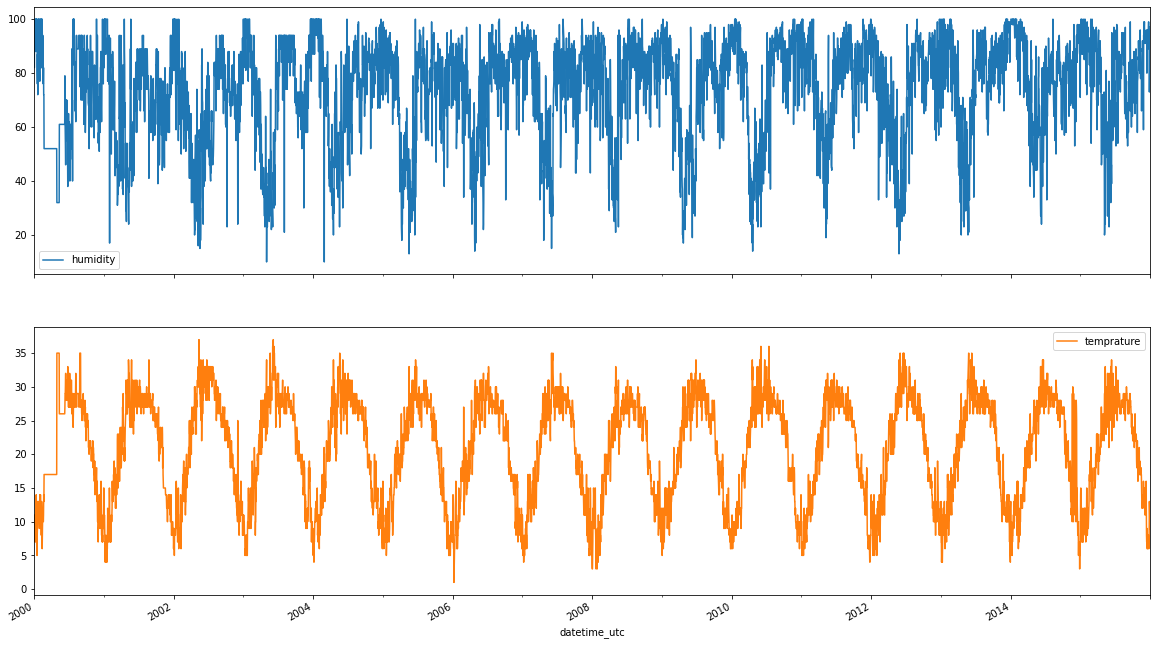

In [ ]:
data_df['2000':'2015'].resample('D').fillna(method='pad').plot(subplots=True, figsize=(20,12))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc649626390>,
      dtype=object)

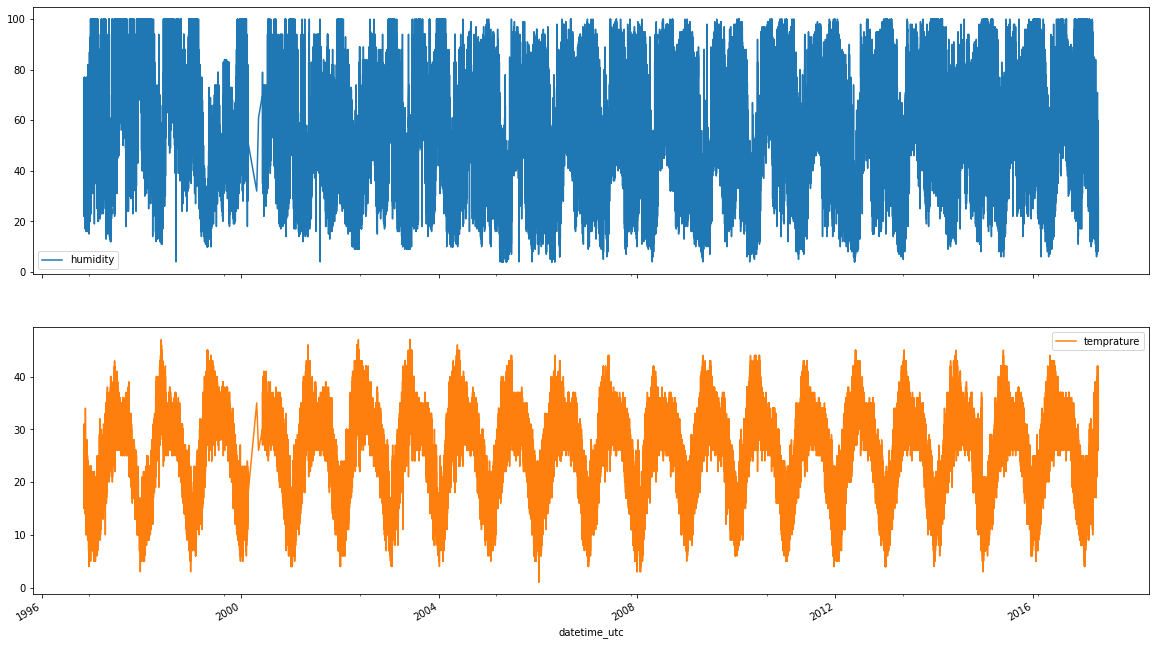

In [ ]:
data_df.plot(subplots=True, figsize=(20,12))

In [ ]:
def plot_rolling_mean_std(ts):
    rolling_mean = ts.rolling(12).mean()
    rolling_std = ts.rolling(12).std()
    plt.figure(figsize=(22,10))

    plt.plot(ts, label='Actual Mean')
    plt.plot(rolling_mean, label='Rolling Mean')
    plt.plot(rolling_std, label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Rolling Standard Deviation')
    plt.legend()
    plt.show()

def perform_dickey_fuller_test(ts):
    result = adfuller(ts, autolag='AIC')
    print(' p val', result[1])
    print('Test statistic: ' , result[0])
    print('Critical Values:' ,result[4])

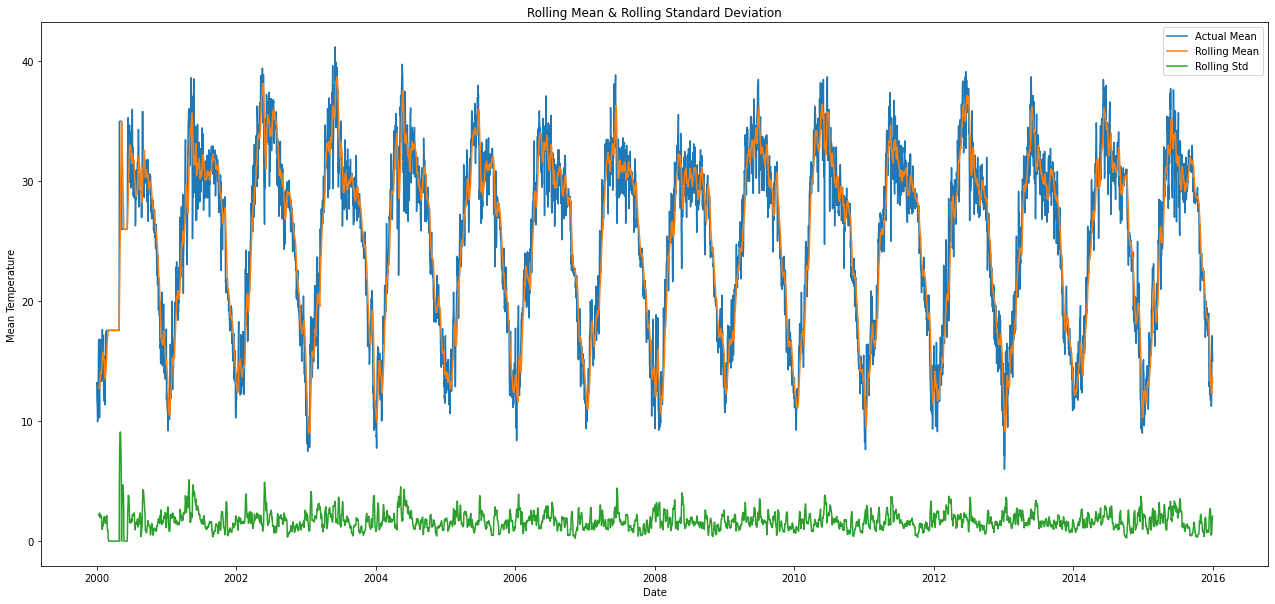

 p val 5.023736222273248e-07
Test statistic:  -5.784983366788547
Critical Values: {'1%': -3.4314762165618764, '5%': -2.862037681193934, '10%': -2.567034913678773}


In [ ]:
plot_rolling_mean_std(train_df.temprature)
perform_dickey_fuller_test(train_df.temprature)

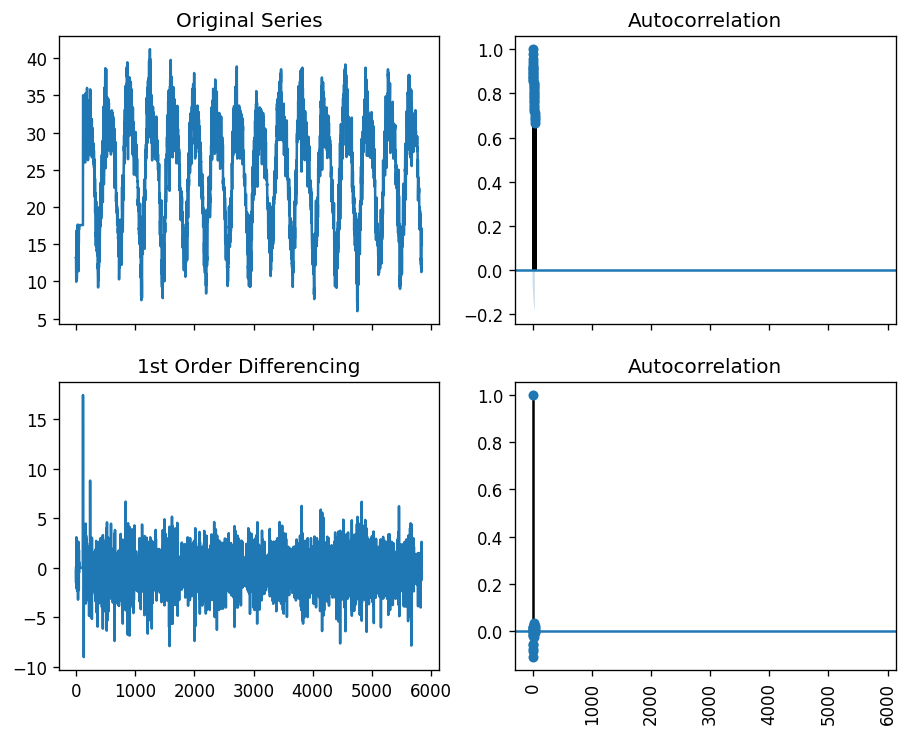

In [ ]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

fig, axes = plt.subplots(2, 2, sharex=True)
axes[0, 0].plot(train_df.values); 
axes[0, 0].set_title('Original Series')
plot_acf(train_df.values, ax=axes[0, 1])

axes[1, 0].plot(train_df.temprature.diff().values); 
axes[1, 0].set_title('1st Order Differencing')
plot_acf(train_df.diff().dropna().values,ax=axes[1, 1])

plt.xticks(rotation='vertical')
plt.show()

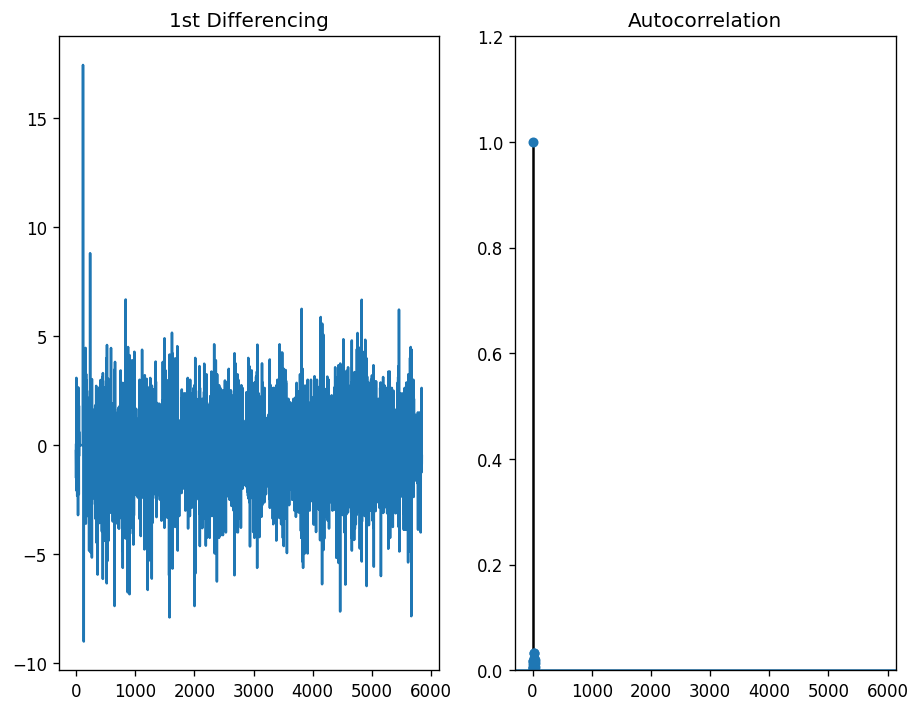

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(train_df.diff().values); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(train_df.diff().dropna().values, ax=axes[1])

plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


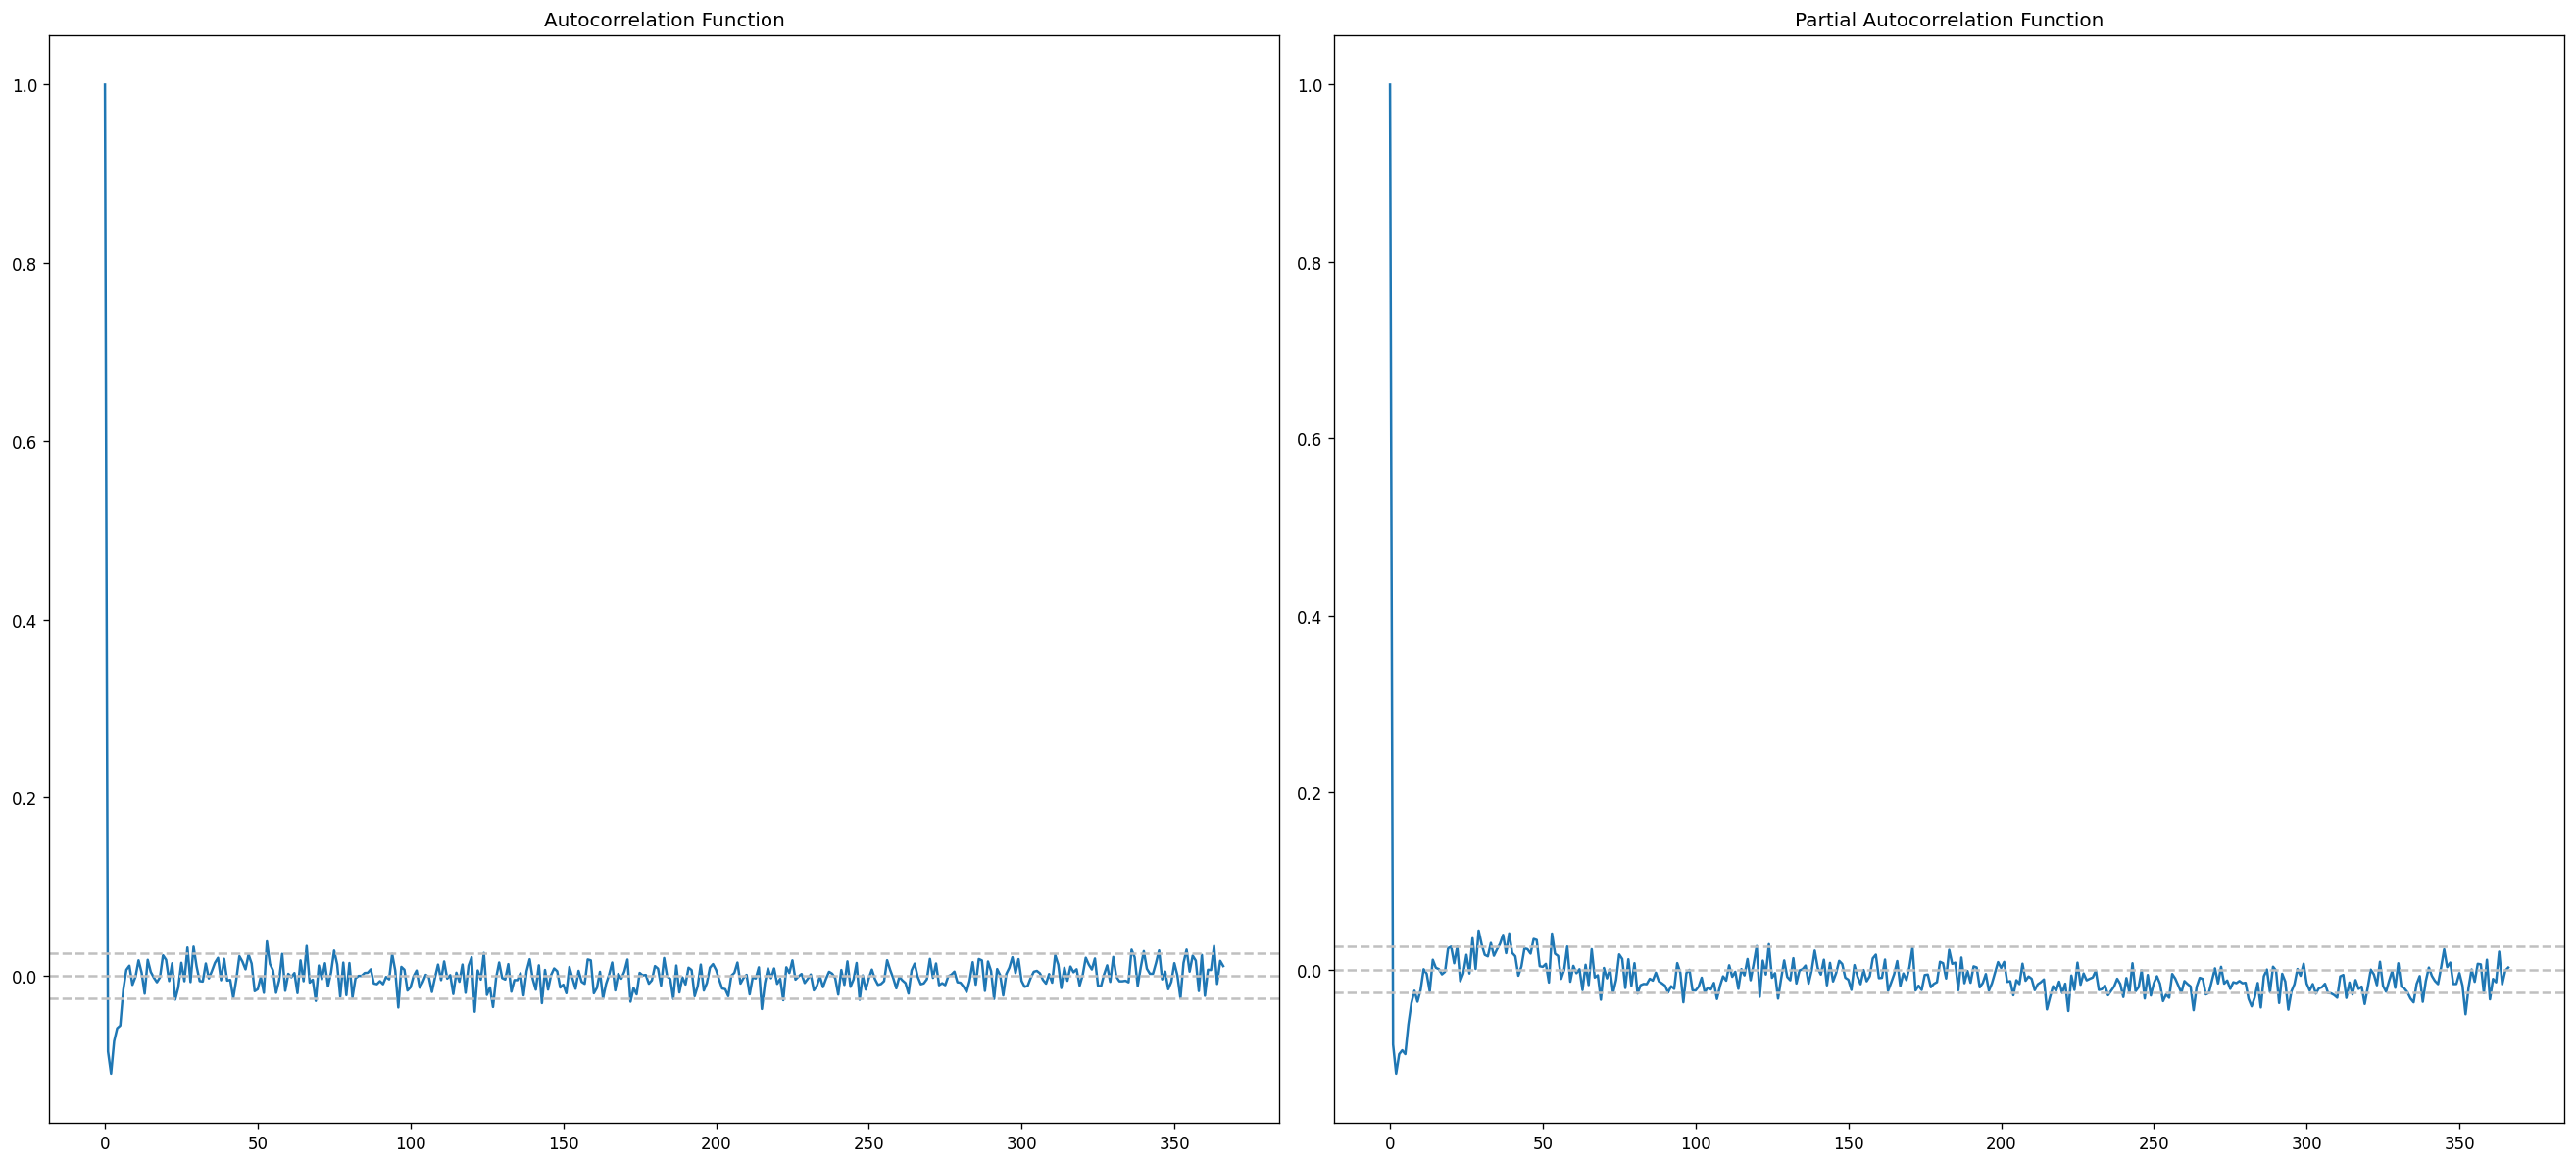

In [ ]:
acf_lag = acf(train_df.diff().dropna().values, nlags=366)
pacf_lag = pacf(train_df.diff().dropna().values, nlags=366, method='ols')

plt.figure(figsize=(22,10))

plt.subplot(121)
plt.plot(acf_lag)
plt.axhline(y=0,linestyle='--',color='silver')
plt.axhline(y=-1.96/np.sqrt(len(train_df.diff().values)),linestyle='--',color='silver')
plt.axhline(y=1.96/np.sqrt(len(train_df.diff().values)),linestyle='--',color='silver')
plt.title("Autocorrelation Function")

plt.subplot(122)
plt.plot(pacf_lag)
plt.axhline(y=0,linestyle='--',color='silver')
plt.axhline(y=-1.96/np.sqrt(len(train_df.diff().values)),linestyle='--',color='silver')
plt.axhline(y=1.96/np.sqrt(len(train_df.diff().values)),linestyle='--',color='silver')
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

In [ ]:

model = ARIMA(train_df.values, order=(2,0,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 5844
Model:                     ARMA(2, 2)   Log Likelihood              -10903.797
Method:                       css-mle   S.D. of innovations              1.563
Date:                Sun, 30 May 2021   AIC                          21819.595
Time:                        15:30:14   BIC                          21859.634
Sample:                             0   HQIC                         21833.518
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.5129      1.700     14.419      0.000      21.181      27.845
ar.L1.y        1.5609      0.033     46.771      0.000       1.495       1.626
ar.L2.y       -0.5635      0.033    -17.039      0.0

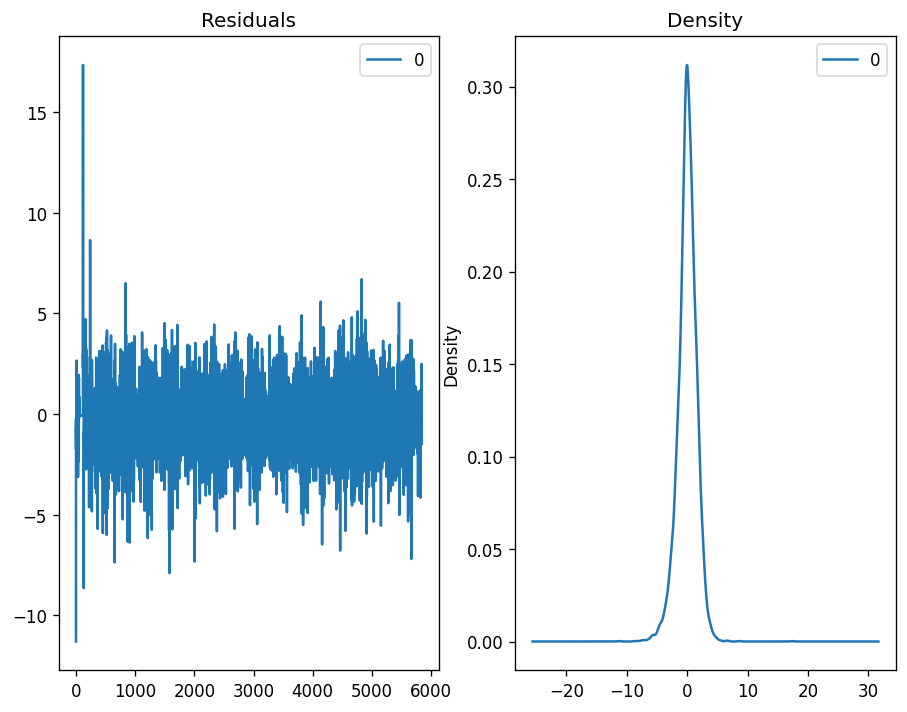

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

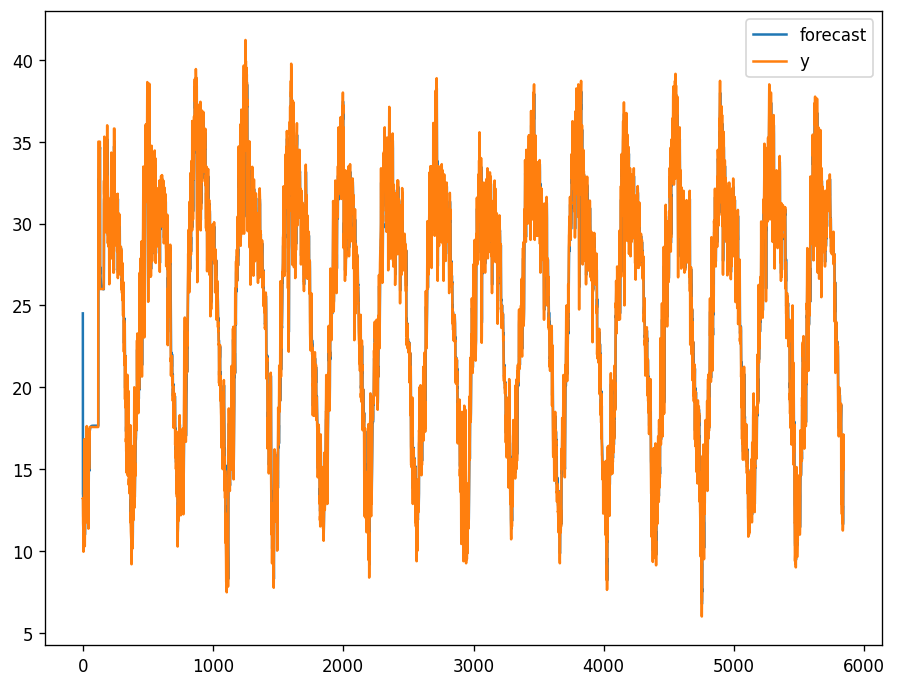

In [ ]:
model_fit.plot_predict(dynamic=False)
plt.show()

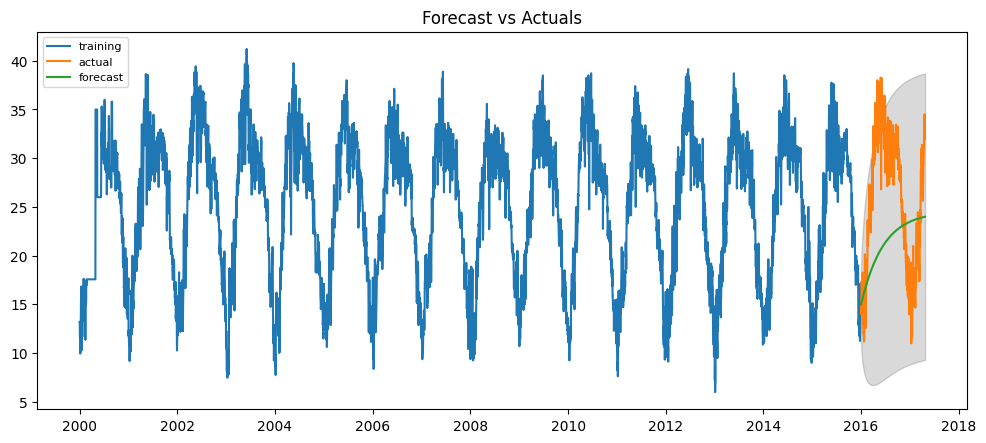

In [ ]:
fc, se, conf = model_fit.forecast(480, alpha=0.05)  # 95% conf

fc_series = pd.Series(fc, index=test_df.index)
lower_series = pd.Series(conf[:, 0], index=test_df.index)
upper_series = pd.Series(conf[:, 1], index=test_df.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_df, label='training')
plt.plot(test_df, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

print('for temperature mae:', mean_absolute_error(fc_series, test_df), ', mse: ', mean_squared_error(fc_series, test_df), ', rmse:', sqrt( mean_squared_error(fc_series, test_df)))

#print('for humidity mae:', mean_absolute_error(fc_seriesh, test_dfh), ', mse: ', mean_squared_error(fc_seriesh, test_dfh), ', rmse:', sqrt( mean_squared_error(fc_seriesh, test_dfh)))

for temperature mae: 7.338564244158177 , mse:  73.22864686068607 , rmse: 8.55737382966796


In [ ]:
train_dfh = data_df['2000':'2015'].resample('D').mean().fillna(method='pad')
train_dfh.drop(columns='temprature', axis=1, inplace=True)
test_dfh = data_df['2016':'2017'].resample('D').mean().fillna(method='pad')
test_dfh.drop(columns='temprature', axis=1, inplace=True)

In [ ]:

modelh = ARIMA(train_dfh.values, order=(2,1,2))
model_fith = modelh.fit(disp=0)
print(model_fith.summary())


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 5843
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -20101.432
Method:                       css-mle   S.D. of innovations              7.548
Date:                Sun, 30 May 2021   AIC                          40214.863
Time:                        16:00:50   BIC                          40254.901
Sample:                             1   HQIC                         40228.786
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0026      0.036     -0.073      0.942      -0.072       0.067
ar.L1.D.y      0.5730      0.207      2.765      0.006       0.167       0.979
ar.L2.D.y     -0.0102      0.139     -0.073      0.9

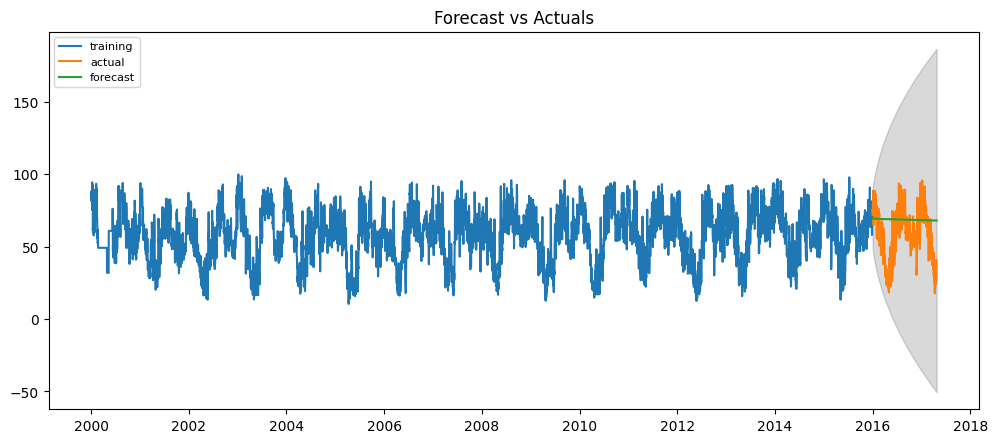

In [ ]:
fch, seh, confh = model_fith.forecast(480, alpha=0.05)  # 95% conf

fc_seriesh = pd.Series(fch, index=test_dfh.index)
lower_seriesh = pd.Series(confh[:, 0], index=test_dfh.index)
upper_seriesh = pd.Series(confh[:, 1], index=test_dfh.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_dfh, label='training')
plt.plot(test_dfh, label='actual')
plt.plot(fc_seriesh, label='forecast')
plt.fill_between(lower_seriesh.index, lower_seriesh, upper_seriesh, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
print('for humidity mae:', mean_absolute_error(fc_seriesh, test_dfh), ', mse: ', mean_squared_error(fc_seriesh, test_dfh), ', rmse:', sqrt( mean_squared_error(fc_seriesh, test_dfh)))

for humidity mae: 15.885565932460525 , mse:  406.66059889866375 , rmse: 20.16582750344413


In [ ]:
train_dfh = data_df['2000':'2015'].resample('M').mean().fillna(method='pad')
train_dfh.drop(columns='temprature', axis=1, inplace=True)
test_dfh = data_df['2016':'2017'].resample('M').mean().fillna(method='pad')
test_dfh.drop(columns='temprature', axis=1, inplace=True)

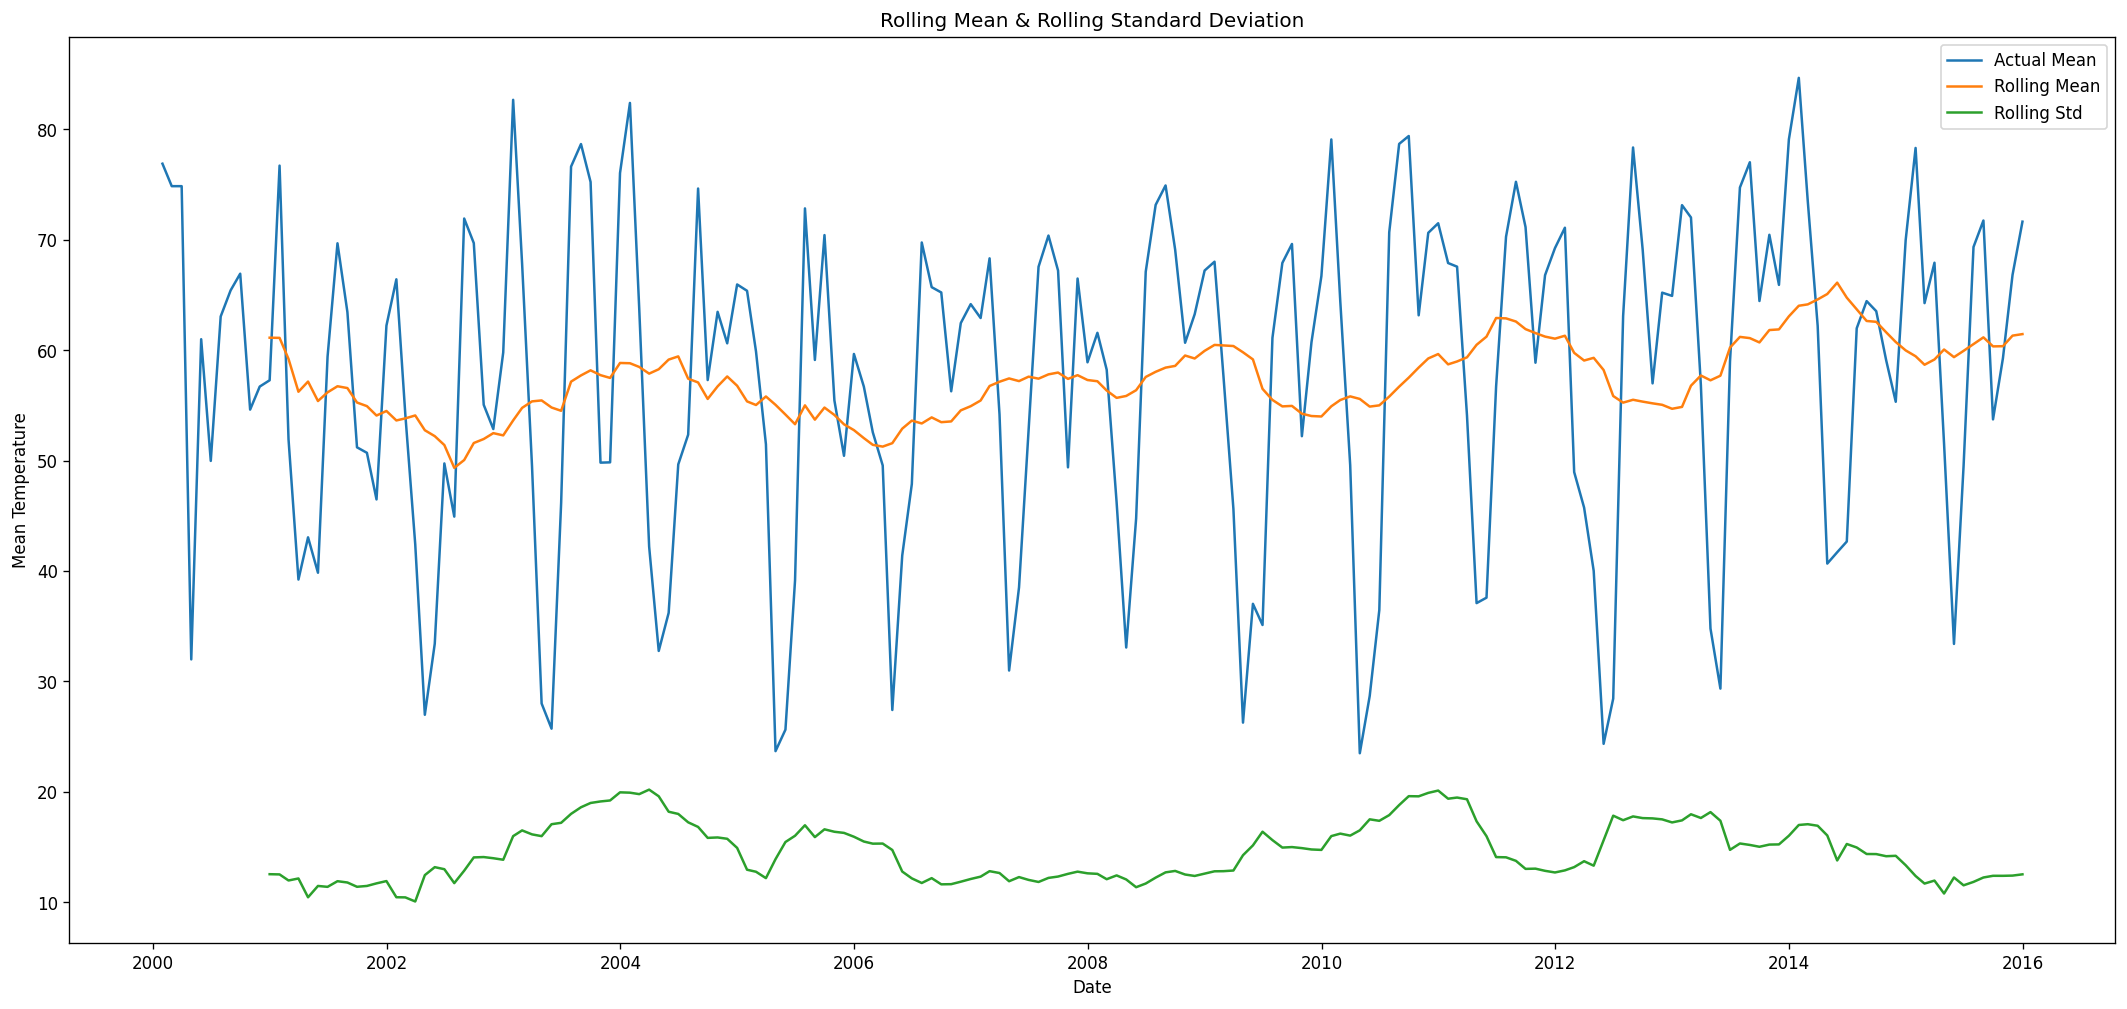

 p val 0.08771394835710061
Test statistic:  -2.6261408043258054
Critical Values: {'1%': -3.4680615871598537, '5%': -2.8781061899535128, '10%': -2.5756015922004134}


In [ ]:
plot_rolling_mean_std(train_dfh.humidity)
perform_dickey_fuller_test(train_dfh.humidity)

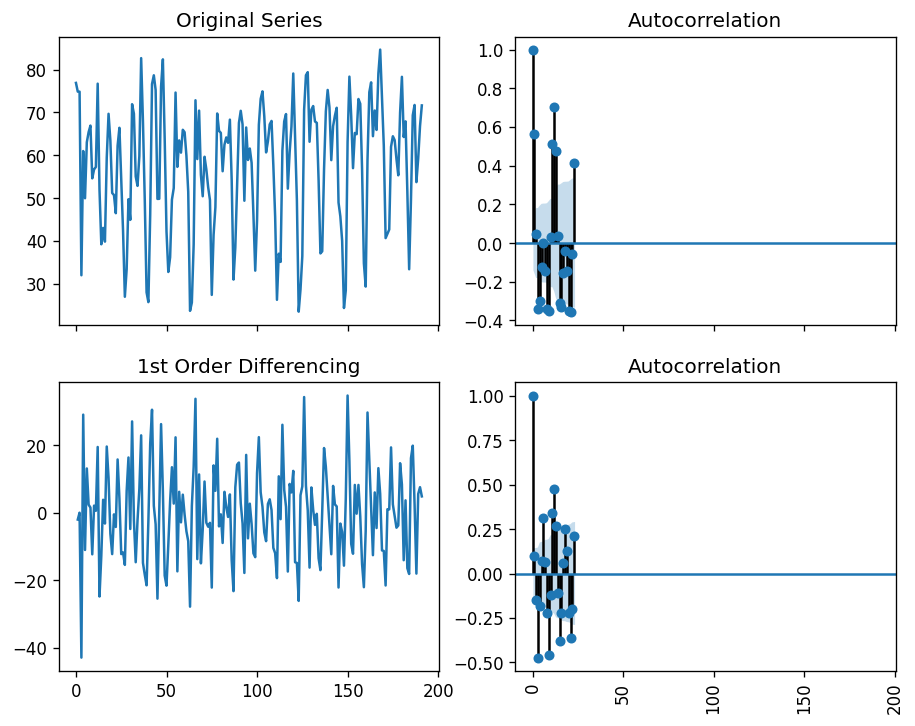

In [ ]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

fig, axes = plt.subplots(2, 2, sharex=True)
axes[0, 0].plot(train_dfh.values); 
axes[0, 0].set_title('Original Series')
plot_acf(train_dfh.values, ax=axes[0, 1])

axes[1, 0].plot(train_dfh.humidity.diff().values); 
axes[1, 0].set_title('1st Order Differencing')
plot_acf(train_dfh.diff().dropna().values,ax=axes[1, 1])

plt.xticks(rotation='vertical')
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


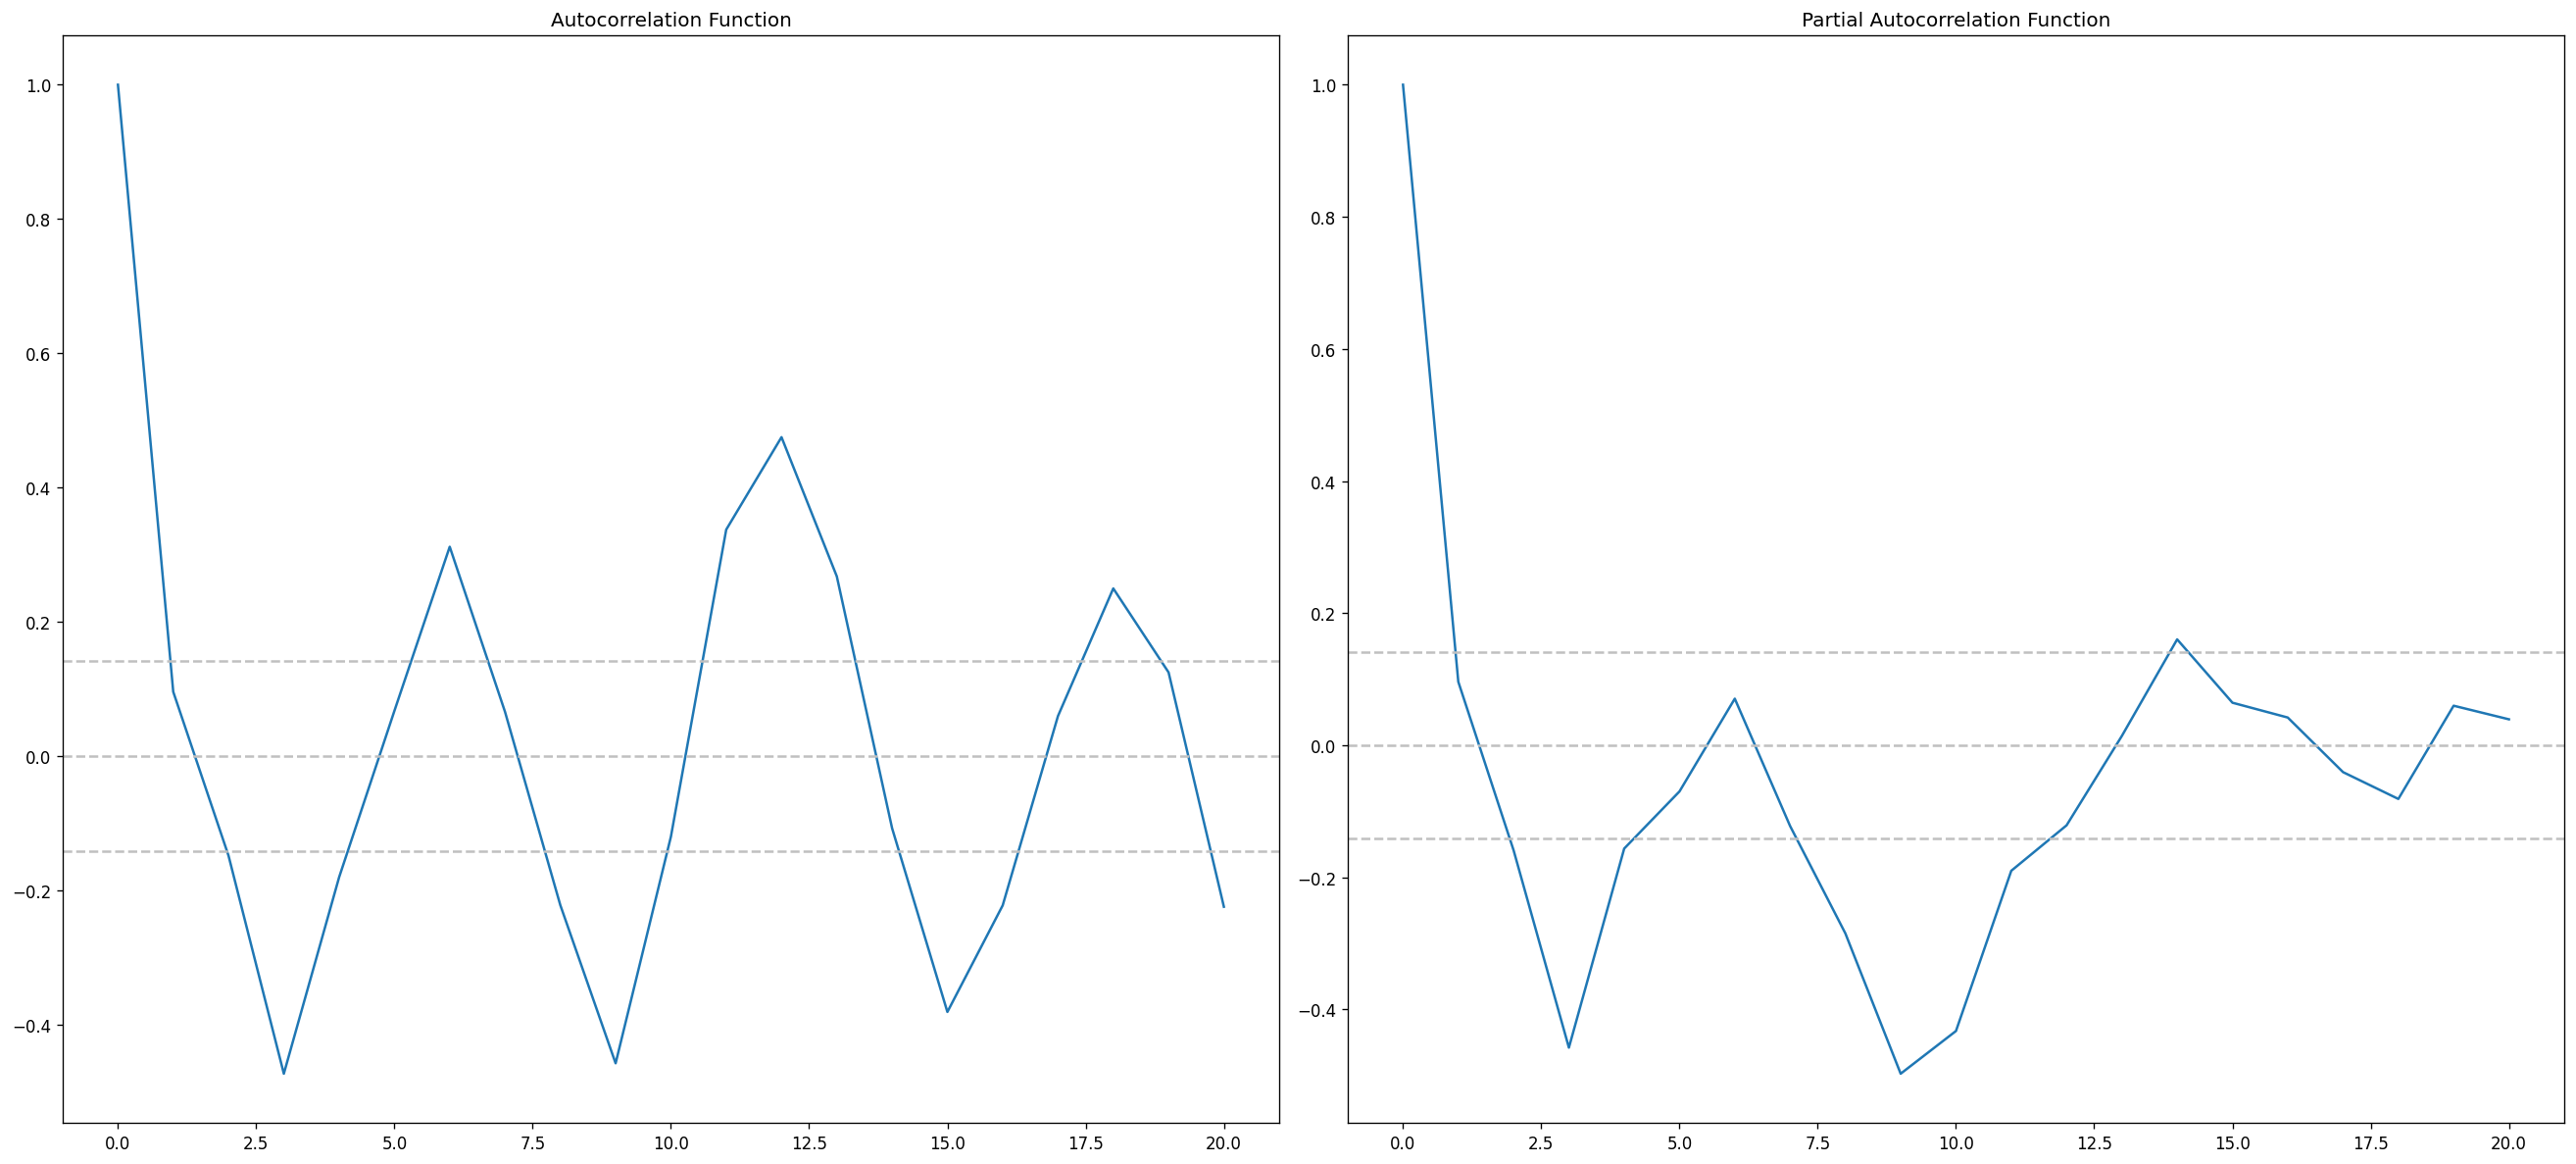

In [ ]:
acf_lagh = acf(train_dfh.diff().dropna().values, nlags=20)
pacf_lagh = pacf(train_dfh.diff().dropna().values, nlags=20, method='ols')

plt.figure(figsize=(22,10))

plt.subplot(121)
plt.plot(acf_lagh)
plt.axhline(y=0,linestyle='--',color='silver')
plt.axhline(y=-1.96/np.sqrt(len(train_dfh.diff().values)),linestyle='--',color='silver')
plt.axhline(y=1.96/np.sqrt(len(train_dfh.diff().values)),linestyle='--',color='silver')
plt.title("Autocorrelation Function")

plt.subplot(122)
plt.plot(pacf_lagh)
plt.axhline(y=0,linestyle='--',color='silver')
plt.axhline(y=-1.96/np.sqrt(len(train_dfh.diff().values)),linestyle='--',color='silver')
plt.axhline(y=1.96/np.sqrt(len(train_dfh.diff().values)),linestyle='--',color='silver')
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

In [ ]:

modelh = ARIMA(train_dfh.values, order=(2,1,2))
model_fith = modelh.fit(disp=0)
print(model_fith.summary())


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  191
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -721.955
Method:                       css-mle   S.D. of innovations             10.369
Date:                Sun, 30 May 2021   AIC                           1455.910
Time:                        15:30:19   BIC                           1475.424
Sample:                             1   HQIC                          1463.814
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0394      0.741      0.053      0.958      -1.413       1.492
ar.L1.D.y      1.0025      0.003    349.967      0.000       0.997       1.008
ar.L2.D.y     -0.9999      0.001  -1699.132      0.0

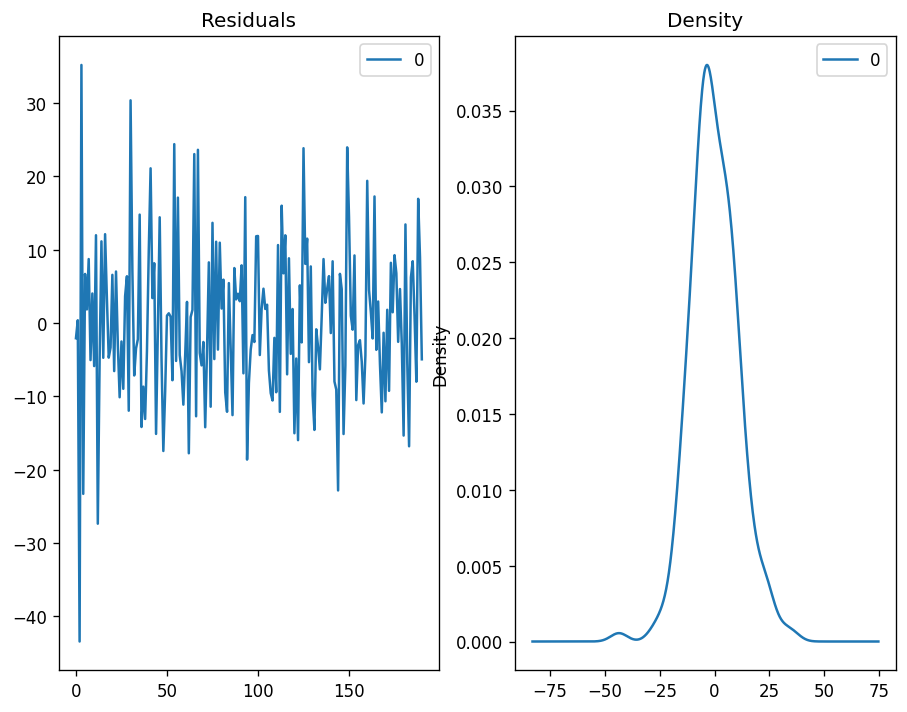

In [ ]:
residualsh = pd.DataFrame(model_fith.resid)
fig, ax = plt.subplots(1,2)
residualsh.plot(title="Residuals", ax=ax[0])
residualsh.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

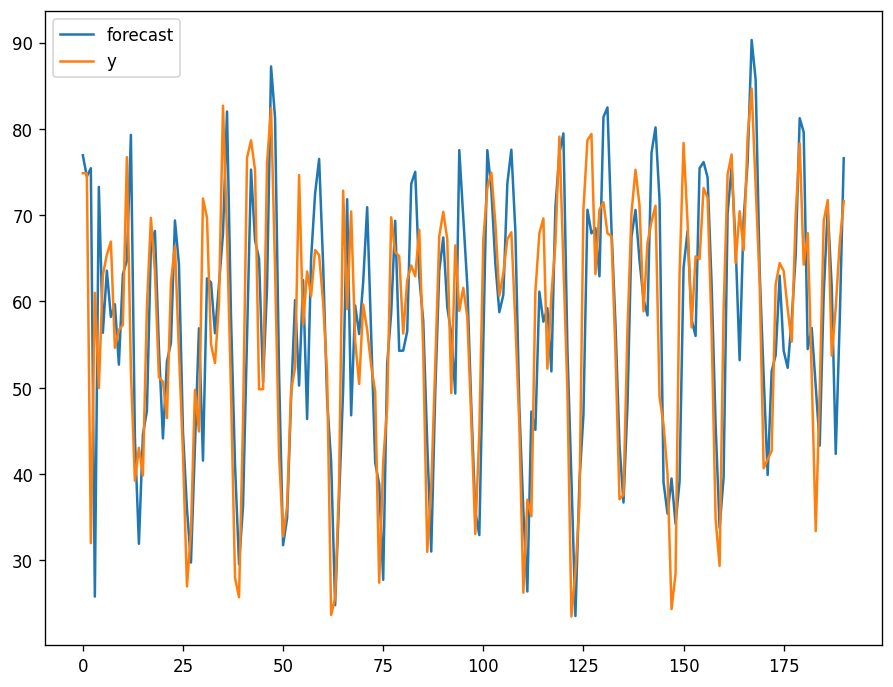

In [ ]:
model_fith.plot_predict(dynamic=False)
plt.show()

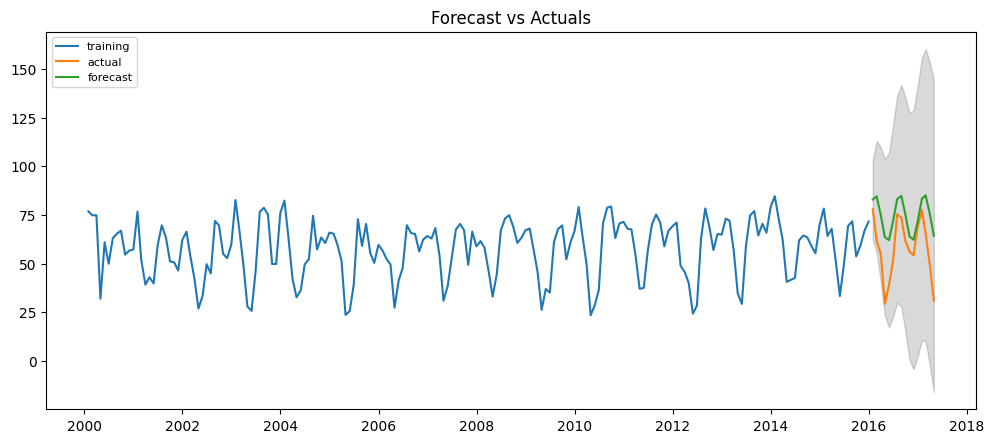

In [ ]:
fch, seh, confh = model_fith.forecast(16, alpha=0.05)  # 95% conf

fc_seriesh = pd.Series(fch, index=test_dfh.index)
lower_seriesh = pd.Series(confh[:, 0], index=test_dfh.index)
upper_seriesh = pd.Series(confh[:, 1], index=test_dfh.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_dfh, label='training')
plt.plot(test_dfh, label='actual')
plt.plot(fc_seriesh, label='forecast')
plt.fill_between(lower_seriesh.index, lower_seriesh, upper_seriesh, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()